<a href="https://colab.research.google.com/github/ahmdspndi19/analisissentimenlstm/blob/main/sentimen_versi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-play-scraper pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import Sort, reviews

app_id = 'app.signal.id'

results, _ = reviews(
    app_id,
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=2000
)

print(f"Jumlah Ulasan yang Diambil: {len(results)}")
print(results[:5])

Jumlah Ulasan yang Diambil: 2000
[{'reviewId': '2e42c888-2637-4fda-a3ef-f3e4348b4c09', 'userName': 'Indri ana', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocKSCjnMPaxnzKRO0U4IaWc8AJ5iPWiI5riUmwset_2EkXTAskk=mo', 'content': 'sdh 2 hari mau bayar tp kode pembayaran tidak bs di bayar, ini bagaimana', 'score': 3, 'thumbsUpCount': 0, 'reviewCreatedVersion': '1.6.5', 'at': datetime.datetime(2025, 7, 1, 8, 21, 1), 'replyContent': 'Hai Sahabat SIGNAL,\nMohon maaf atas kendala tersebut.\nSilahkan kirim detail kendala Anda ke email info@samsatdigital.id atau hubungi Customer Service di website samsatdigital.id untuk bisa ditindaklanjuti.\nKami terus berupaya meningkatkan layanan agar aplikasi SIGNAL dapat digunakan lebih mudah & nyaman oleh semua pengguna.\nTerima kasih,\nTim SIGNAL', 'repliedAt': datetime.datetime(2025, 7, 2, 1, 45, 43), 'appVersion': '1.6.5'}, {'reviewId': '6a152b88-ba6d-4d6e-9f43-e10e303f4052', 'userName': 'Juss Raffa', 'userImage': 'https://play-lh.googleuserc

In [ ]:
from google_play_scraper import Sort, reviews
import pandas as pd

app_id = 'app.signal.id'

all_reviews = []
continuation_token = None

while len(all_reviews) < 1500:
    results, continuation_token = reviews(
        app_id,
        lang='id',
        country='id',
        sort=Sort.NEWEST,
        count=200,
        continuation_token=continuation_token
    )
    long_reviews = [r for r in results if len(r['content']) > 150]
    all_reviews.extend(long_reviews)

    if not continuation_token:
        break

df = pd.DataFrame(all_reviews)
df['at'] = pd.to_datetime(df['at'])
df = df[df['at'].dt.year.isin([2024, 2025])]
df = df.sort_values(by='at', ascending=False).head(1500)

# Ambil kolom yang diminta saja
print(df[['userName', 'content', 'score', 'at']])

df[['userName', 'content', 'score', 'at']].to_csv('ulasan_signal__2025_2024.csv', index=False, encoding='utf-8-sig')


                    userName  \
0              Erwinsyah Hrp   
1         Triyono Parmoredjo   
2              Phalwa Andrea   
3                  Air Putih   
4         Nining Dwi Lestari   
...                      ...   
1495                Mat Zani   
1496          Yogi Ihsanudin   
1497              BH Channel   
1498  Muhamad Genta Ramadhan   
1499           Rico Wibisono   

                                                content  score  \
0     Sampai dgn saat ini masih sangat terbantu dgn ...      4   
1     App Signal Samsat digital ini sangat membantu ...      5   
2     aplikasi banyak error nya.. woi admin dibaca l...      1   
3     Bagi pemilik kendaraan yang bukan atas nama se...      2   
4     sudah coba berapa kali untuk mendaftarkan kend...      2   
...                                                 ...    ...   
1495  Biaya parkir 20.000 Biaya pengiriman expedisi ...      1   
1496  tolong di tingkatkan supaya setiap kali bayar ...      5   
1497  mantaff, dimana

In [ ]:
from google_play_scraper import reviews, Sort

app_id = 'app.signal.id'

def get_reviews(app_id, lang='id', count=10000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )
        return result, continuation_token
    except Exception as e:
        print(f"Error: {e}")
        return None, None

reviews_data, continuation_token = get_reviews(app_id)

if reviews_data is not None:
    print(f"Jumlah ulasan: {len(reviews_data)}")
    if len(reviews_data) > 0:
        print("Contoh ulasan:")
        print(reviews_data[0])
else:
    print("Tidak dapat mengambil ulasan.")

# SCRAPING YOUTUBE

In [ ]:
from google_play_scraper import reviews, Sort

app_id = 'app.signal.id'

def get_reviews(app_id, lang='id', count=20000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )
        return result, continuation_token
    except Exception as e:
        print(f"Error: {e}")
        return None, None

reviews_data, continuation_token = get_reviews(app_id)

if reviews_data is not None:
    print(f"Jumlah ulasan: {len(reviews_data)}")
    if len(reviews_data) > 0:
        print("Contoh ulasan:")
        print(reviews_data[0])
else:
    print("Tidak dapat mengambil ulasan.")

Jumlah ulasan: 20000
Contoh ulasan:
{'reviewId': 'aa6cc571-e26d-4307-8826-e25bfb5b578a', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'pelayanan yang mudah dan praktis cocok untuk karyawan yang susah ijin kerja, jd sekarang nguru perpanjangan STNK ga harus ke kantor Samsat atau Samsat keliling cukup urus lewat hp saja dan tunggu STNK dikirim kerumah selesai', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '1.6.5', 'at': datetime.datetime(2025, 7, 10, 13, 12, 43), 'replyContent': 'Hai Sahabat SIGNAL, Terima kasih atas ulasannya! 😊\nJika berkenan, rekomendasikan Aplikasi SIGNAL kepada sahabat dan keluarga, agar urusan pajak kendaraan bisa jadi lebih mudah.\nUntuk informasi SIGNAL lebih lanjut bisa mengunjungi website samsatdigital.id atau menghubungi email Customer Service info@samsatdigital.com.\nTerima kasih,\nTim SIGNAL\n', 'repliedAt': datetim

In [ ]:
import csv

def export_to_csv(reviews, file_name='hasil_scraper_ulasan_app_signal.csv'):
    if reviews:
        fieldnames = ['Review ID', 'Username', 'Rating', 'Review Text', 'Date']
        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'Review ID': review['reviewId'],
                    'Username': review['userName'],
                    'Rating': review['score'],
                    'Review Text': review['content'],
                    'Date': review['at']
                })
        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

# Pemanggilan fungsi export_to_csv, diasumsikan 'reviews_data' dari bagian sebelumnya tersedia
export_to_csv(reviews_data)

Data berhasil diekspor ke 'hasil_scraper_ulasan_app_signal.csv'


In [ ]:
import pandas as pd

# Misal Anda sudah punya file 'playstore_reviews.csv'
df = pd.read_csv('hasil_scraper_ulasan_app_signal.csv')

# 1. Buat kolom baru untuk menyimpan panjang karakter setiap ulasan
df['panjang_karakter'] = df['Review Text'].str.len()

# 2. (Sangat Direkomendasikan) Analisis distribusi panjang karakter
# Ini akan membantu Anda membuat keputusan yang lebih baik & menjustifikasinya
print("Statistik Distribusi Panjang Karakter:")
print(df['panjang_karakter'].describe())

# 3. Filter ulasan berdasarkan panjang karakter minimal
MIN_LENGTH = 50
df_filtered = df[df['panjang_karakter'] >= MIN_LENGTH].copy()

print(f"\nJumlah ulasan awal: {len(df)}")
print(f"Jumlah ulasan setelah difilter (>= {MIN_LENGTH} karakter): {len(df_filtered)}")

# 4. Simpan dataset yang sudah bersih
df_filtered.to_csv('dataset_top2vec_clean.csv', index=False)

Statistik Distribusi Panjang Karakter:
count    20000.000000
mean        68.507500
std         71.924654
min          1.000000
25%         21.000000
50%         46.000000
75%         91.000000
max        500.000000
Name: panjang_karakter, dtype: float64

Jumlah ulasan awal: 20000
Jumlah ulasan setelah difilter (>= 50 karakter): 9526


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/hasil_scraper_ulasan_app_signal.csv")

In [ ]:
data = pd.DataFrame(data[['Rating', 'Review Text']])
data.head(5)

,Rating,Review Text
0,5,Alhamdulillah sangat mempermudah Skali.
1,5,"bagus, terbukti dan stnk sudah sampai di rumah..."
2,5,terimakasih signal. aku akan bayar pajak melal...
3,5,aplikasi sangat membantu..namum saat pengirima...
4,3,"tolong di bantu pengiriman blm jg sampai, mau ..."


In [ ]:
df = pd.DataFrame(data[['Rating','Review Text']])
df.head(5)

,Rating,Review Text
0,5,Alhamdulillah sangat mempermudah Skali.
1,5,"bagus, terbukti dan stnk sudah sampai di rumah..."
2,5,terimakasih signal. aku akan bayar pajak melal...
3,5,aplikasi sangat membantu..namum saat pengirima...
4,3,"tolong di bantu pengiriman blm jg sampai, mau ..."


In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import sent_tokenize

# Pastikan model 'punkt' dari NLTK sudah diunduh
nltk.download('punkt_tab')
nltk.download('punkt', quiet=True)

# =======================================================
# SETUP AWAL SESUAI PERMINTAAN ANDA
# =======================================================

# 1. Membuat DataFrame HANYA dengan kolom 'Rating' dan 'Review Text'
df = pd.DataFrame(data[['Rating','Review Text']])

def bersihkan_dan_pecah_kalimat(text):
    """
    Fungsi untuk membersihkan tanda baca yang bermasalah
    dan memecah teks menjadi kalimat.
    """
    if not isinstance(text, str):
        return []

    # 1. Ganti titik berulang (.., ...) dengan satu titik dan spasi.
    #    Ini penting untuk memisahkan kata seperti "membantu..namun"
    text = re.sub(r'\.{2,}', '. ', text)

    # 2. Ganti simbol lain (selain huruf, angka, dan titik) dengan spasi.
    text = re.sub(r'[^a-zA-Z0-9\.\s]', ' ', text)

    # 3. Rapikan spasi yang berlebihan menjadi satu spasi saja.
    text = re.sub(r'\s+', ' ', text).strip()

    # 4. Pecah teks yang sudah bersih menjadi kalimat.
    kalimat = nltk.sent_tokenize(text)

    # 5. Membersihkan spasi kosong di awal/akhir setiap kalimat hasil pemecahan
    kalimat_bersih = [k.strip() for k in kalimat if k.strip()]

    return kalimat_bersih

df['Kalimat'] = df['Review Text'].apply(bersihkan_dan_pecah_kalimat)

# 'Explode' DataFrame agar setiap kalimat menjadi baris baru
df_hasil = df.explode('Kalimat', ignore_index=True)
# 5. Menampilkan Hasil Akhir
# Diubah dari 'userName' menjadi 'Rating'
print("## 3. DataFrame Hasil Akhir (Setelah Explode) ##")
print(df_hasil[['Rating', 'Kalimat']])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## 3. DataFrame Hasil Akhir (Setelah Explode) ##
      Rating                                            Kalimat
0          5            Alhamdulillah sangat mempermudah Skali.
1          5  bagus terbukti dan stnk sudah sampai di rumah ...
2          5                                terimakasih signal.
3          5               aku akan bayar pajak melalui signal.
4          5   terimakasih bapenda dan pemerintah prop Lampung.
...      ...                                                ...
6646       5  Aplikasi ini sangat memudahkan dalam pembayara...
6647       4  semenjak di update apk nya mau bayar pajak koq...
6648       4                                               good
6649       5                                             mantap
6650       4                                   bagus cuman lama

[6651 rows x 2 columns]


In [ ]:
df = pd.DataFrame(df_hasil[['Kalimat']])
df.head(5)

,Kalimat
0,Alhamdulillah sangat mempermudah Skali.
1,bagus terbukti dan stnk sudah sampai di rumah ...
2,terimakasih signal.
3,aku akan bayar pajak melalui signal.
4,terimakasih bapenda dan pemerintah prop Lampung.


In [ ]:
df.drop_duplicates(subset="Kalimat", keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5557 entries, 0 to 6650
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Kalimat  5556 non-null   object
dtypes: object(1)
memory usage: 86.8+ KB


In [ ]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5556 entries, 0 to 6650
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Kalimat  5556 non-null   object
dtypes: object(1)
memory usage: 86.8+ KB


In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile('['
                               u'\U0001F600-\U0001F64F'  # emoticons
                               u'\U0001F300-\U0001F5FF'  # symbols & pictographs
                               u'\U0001F680-\U0001F6FF'  # transport & map symbols
                               u'\U0001F700-\U0001F77F'  # alchemical symbols
                               u'\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
                               u'\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
                               u'\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
                               u'\U0001FA00-\U0001FA6F'  # Chess Symbols
                               u'\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
                               u'\U0001F004-\U0001F0CF'  # Additional emoticons
                               u'\U0001F1E0-\U0001F1FF'  # flags
                               ']+', flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
        return tweet
    else:
        return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d+', '', tweet) # Mengubah '\d' menjadi '\d+' untuk menangkap satu atau lebih digit
        return tweet
    else:
        return tweet

# Fungsi hapus username
def remove_usernames(text):
    return re.sub(r'@\w+', '', text)

# Aplikasi fungsi pembersihan
df['cleaning'] = df['Kalimat'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_usernames(x) if isinstance(x, str) else x)
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(5) # Baris ini terpotong di gambar kedua, kemungkinan df.head(N)

,Kalimat,cleaning
0,Alhamdulillah sangat mempermudah Skali.,Alhamdulillah sangat mempermudah Skali
1,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...
2,terimakasih signal.,terimakasih signal
3,aku akan bayar pajak melalui signal.,aku akan bayar pajak melalui signal
4,terimakasih bapenda dan pemerintah prop Lampung.,terimakasih bapenda dan pemerintah prop Lampung


# **CASE FOLDING**

In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,Kalimat,cleaning,case_folding
0,Alhamdulillah sangat mempermudah Skali.,Alhamdulillah sangat mempermudah Skali,alhamdulillah sangat mempermudah skali
1,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...
2,terimakasih signal.,terimakasih signal,terimakasih signal
3,aku akan bayar pajak melalui signal.,aku akan bayar pajak melalui signal,aku akan bayar pajak melalui signal
4,terimakasih bapenda dan pemerintah prop Lampung.,terimakasih bapenda dan pemerintah prop Lampung,terimakasih bapenda dan pemerintah prop lampung


# **NORMALISASI**

In [ ]:
import pandas as pd
import requests
from io import BytesIO

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = [] # Ini tampaknya untuk menyimpan hash kata tidak baku asli

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(word) # Simpan kata tidak baku asli
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words) # Bergabung dengan spasi, bukan titik

    else: # Jika input bukan string
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

# Baca dataset kamu (pastikan df sudah tersedia)
data = pd.DataFrame(df[['Kalimat','cleaning', 'case_folding']])
data.head()

,Kalimat,cleaning,case_folding
0,Alhamdulillah sangat mempermudah Skali.,Alhamdulillah sangat mempermudah Skali,alhamdulillah sangat mempermudah skali
1,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...
2,terimakasih signal.,terimakasih signal,terimakasih signal
3,aku akan bayar pajak melalui signal.,aku akan bayar pajak melalui signal,aku akan bayar pajak melalui signal
4,terimakasih bapenda dan pemerintah prop Lampung.,terimakasih bapenda dan pemerintah prop Lampung,terimakasih bapenda dan pemerintah prop lampung


In [ ]:
import pandas as pd # Asumsi import ini ada di awal file
import requests # Asumsi import ini ada di awal file
from io import BytesIO # Asumsi import ini ada di awal file

# Unduh dan baca kamus dari GitHub
url = "https://github.com/analysisdatasentiment/kamus_kata_baku/raw/main/kamuskatabaku.xlsx"
response = requests.get(url)
file_excel = BytesIO(response.content)
kamus_data = pd.read_excel(file_excel)

# Buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# Terapkan fungsi normalisasi (asumsi replace_taboo_words sudah didefinisikan)
# SINTAKS BENAR
data[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = data['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)
# Ambil kolom yang relevan
df = pd.DataFrame(data[['Kalimat', 'cleaning', 'case_folding', 'normalisasi']])
df.head(5)

,Kalimat,cleaning,case_folding,normalisasi
0,Alhamdulillah sangat mempermudah Skali.,Alhamdulillah sangat mempermudah Skali,alhamdulillah sangat mempermudah skali,alhamdulillah sangat mempermudah sekali
1,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...
2,terimakasih signal.,terimakasih signal,terimakasih signal,terimakasih signal
3,aku akan bayar pajak melalui signal.,aku akan bayar pajak melalui signal,aku akan bayar pajak melalui signal,aku akan bayar pajak melalui signal
4,terimakasih bapenda dan pemerintah prop Lampung.,terimakasih bapenda dan pemerintah prop Lampung,terimakasih bapenda dan pemerintah prop lampung,terimakasih bapenda dan pemerintah prop lampung


# **Normalisasi kaggle**

In [ ]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() or char.isspace() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                else:
                    replaced_words.append(word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []
    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

data = pd.DataFrame(df[['Kalimat','cleaning', 'case_folding']])
data.head()

,Kalimat,cleaning,case_folding
0,Alhamdulillah sangat mempermudah Skali.,Alhamdulillah sangat mempermudah Skali,alhamdulillah sangat mempermudah skali
1,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...
2,terimakasih signal.,terimakasih signal,terimakasih signal
3,aku akan bayar pajak melalui signal.,aku akan bayar pajak melalui signal,aku akan bayar pajak melalui signal
4,terimakasih bapenda dan pemerintah prop Lampung.,terimakasih bapenda dan pemerintah prop Lampung,terimakasih bapenda dan pemerintah prop lampung


In [ ]:
kamus_data = pd.read_excel('kamuskatabaku.xlsx')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))
kamus_data.head()

,tidak_baku,kata_baku
0,tq,terima kasih
1,woww,wow
2,terimakasih,terima kasih
3,woww,wow
4,aminn,amin


In [ ]:
# Kode yang Benar
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku))
)

# Setelah itu, Anda bisa melanjutkan kode Anda
df = pd.DataFrame(data[['Kalimat','cleaning','case_folding', 'normalisasi']])
df.head(10)

,Kalimat,cleaning,case_folding,normalisasi
0,Alhamdulillah sangat mempermudah Skali.,Alhamdulillah sangat mempermudah Skali,alhamdulillah sangat mempermudah skali,alhamdulillah sangat mempermudah sekali
1,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...
2,terimakasih signal.,terimakasih signal,terimakasih signal,terima kasih signal
3,aku akan bayar pajak melalui signal.,aku akan bayar pajak melalui signal,aku akan bayar pajak melalui signal,aku akan bayar pajak melalui signal
4,terimakasih bapenda dan pemerintah prop Lampung.,terimakasih bapenda dan pemerintah prop Lampung,terimakasih bapenda dan pemerintah prop lampung,terima kasih bapenda dan pemerintah prop lampung
5,aplikasi sangat membantu.,aplikasi sangat membantu,aplikasi sangat membantu,aplikasi sangat membantu
6,namum saat pengiriman dokumen nya lama sekali.,namum saat pengiriman dokumen nya lama sekali,namum saat pengiriman dokumen nya lama sekali,namum saat pengiriman dokumen ya lama sekali
7,tapi buat yang awam aplikasi ini cukup membantu.,tapi buat yang awam aplikasi ini cukup membantu,tapi buat yang awam aplikasi ini cukup membantu,tapi buat yang awam aplikasi ini cukup membantu
8,terus tingkatkan lagi agar mudah dalam akses nya.,terus tingkatkan lagi agar mudah dalam akses nya,terus tingkatkan lagi agar mudah dalam akses nya,terus tingkatkan lagi agar mudah dalam akses ya
9,tolong di bantu pengiriman blm jg sampai mau l...,tolong di bantu pengiriman blm jg sampai mau l...,tolong di bantu pengiriman blm jg sampai mau l...,tolong di bantu pengiriman belum juga sampai m...


# **TOKENIZE**

In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)
df.head(10)

,Kalimat,cleaning,case_folding,normalisasi,tokenize
0,Alhamdulillah sangat mempermudah Skali.,Alhamdulillah sangat mempermudah Skali,alhamdulillah sangat mempermudah skali,alhamdulillah sangat mempermudah sekali,"[alhamdulillah, sangat, mempermudah, sekali]"
1,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,"[bagus, terbukti, dan, stnk, sudah, sampai, di..."
2,terimakasih signal.,terimakasih signal,terimakasih signal,terima kasih signal,"[terima, kasih, signal]"
3,aku akan bayar pajak melalui signal.,aku akan bayar pajak melalui signal,aku akan bayar pajak melalui signal,aku akan bayar pajak melalui signal,"[aku, akan, bayar, pajak, melalui, signal]"
4,terimakasih bapenda dan pemerintah prop Lampung.,terimakasih bapenda dan pemerintah prop Lampung,terimakasih bapenda dan pemerintah prop lampung,terima kasih bapenda dan pemerintah prop lampung,"[terima, kasih, bapenda, dan, pemerintah, prop..."
5,aplikasi sangat membantu.,aplikasi sangat membantu,aplikasi sangat membantu,aplikasi sangat membantu,"[aplikasi, sangat, membantu]"
6,namum saat pengiriman dokumen nya lama sekali.,namum saat pengiriman dokumen nya lama sekali,namum saat pengiriman dokumen nya lama sekali,namum saat pengiriman dokumen ya lama sekali,"[namum, saat, pengiriman, dokumen, ya, lama, s..."
7,tapi buat yang awam aplikasi ini cukup membantu.,tapi buat yang awam aplikasi ini cukup membantu,tapi buat yang awam aplikasi ini cukup membantu,tapi buat yang awam aplikasi ini cukup membantu,"[tapi, buat, yang, awam, aplikasi, ini, cukup,..."
8,terus tingkatkan lagi agar mudah dalam akses nya.,terus tingkatkan lagi agar mudah dalam akses nya,terus tingkatkan lagi agar mudah dalam akses nya,terus tingkatkan lagi agar mudah dalam akses ya,"[terus, tingkatkan, lagi, agar, mudah, dalam, ..."
9,tolong di bantu pengiriman blm jg sampai mau l...,tolong di bantu pengiriman blm jg sampai mau l...,tolong di bantu pengiriman blm jg sampai mau l...,tolong di bantu pengiriman belum juga sampai m...,"[tolong, di, bantu, pengiriman, belum, juga, s..."


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Kalimat,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,Alhamdulillah sangat mempermudah Skali.,Alhamdulillah sangat mempermudah Skali,alhamdulillah sangat mempermudah skali,alhamdulillah sangat mempermudah sekali,"[alhamdulillah, sangat, mempermudah, sekali]","[alhamdulillah, mempermudah]"
1,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,"[bagus, terbukti, dan, stnk, sudah, sampai, di...","[bagus, terbukti, stnk, rumah]"
2,terimakasih signal.,terimakasih signal,terimakasih signal,terima kasih signal,"[terima, kasih, signal]","[terima, kasih, signal]"
3,aku akan bayar pajak melalui signal.,aku akan bayar pajak melalui signal,aku akan bayar pajak melalui signal,aku akan bayar pajak melalui signal,"[aku, akan, bayar, pajak, melalui, signal]","[bayar, pajak, signal]"
4,terimakasih bapenda dan pemerintah prop Lampung.,terimakasih bapenda dan pemerintah prop Lampung,terimakasih bapenda dan pemerintah prop lampung,terima kasih bapenda dan pemerintah prop lampung,"[terima, kasih, bapenda, dan, pemerintah, prop...","[terima, kasih, bapenda, pemerintah, prop, lam..."
5,aplikasi sangat membantu.,aplikasi sangat membantu,aplikasi sangat membantu,aplikasi sangat membantu,"[aplikasi, sangat, membantu]","[aplikasi, membantu]"
6,namum saat pengiriman dokumen nya lama sekali.,namum saat pengiriman dokumen nya lama sekali,namum saat pengiriman dokumen nya lama sekali,namum saat pengiriman dokumen ya lama sekali,"[namum, saat, pengiriman, dokumen, ya, lama, s...","[namum, pengiriman, dokumen, ya]"
7,tapi buat yang awam aplikasi ini cukup membantu.,tapi buat yang awam aplikasi ini cukup membantu,tapi buat yang awam aplikasi ini cukup membantu,tapi buat yang awam aplikasi ini cukup membantu,"[tapi, buat, yang, awam, aplikasi, ini, cukup,...","[awam, aplikasi, membantu]"
8,terus tingkatkan lagi agar mudah dalam akses nya.,terus tingkatkan lagi agar mudah dalam akses nya,terus tingkatkan lagi agar mudah dalam akses nya,terus tingkatkan lagi agar mudah dalam akses ya,"[terus, tingkatkan, lagi, agar, mudah, dalam, ...","[tingkatkan, mudah, akses, ya]"
9,tolong di bantu pengiriman blm jg sampai mau l...,tolong di bantu pengiriman blm jg sampai mau l...,tolong di bantu pengiriman blm jg sampai mau l...,tolong di bantu pengiriman belum juga sampai m...,"[tolong, di, bantu, pengiriman, belum, juga, s...","[tolong, bantu, pengiriman, live, chat, agent]"


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.5 MB/s eta 0:00:00


In [ ]:
# # Installation


# Imports
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

# Stemmer Initialization
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Function Definition
def stem_text(text):
    return [stemmer.stem(word) for word in text]

# DataFrame Application
df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,Kalimat,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,Alhamdulillah sangat mempermudah Skali.,Alhamdulillah sangat mempermudah Skali,alhamdulillah sangat mempermudah skali,alhamdulillah sangat mempermudah sekali,"[alhamdulillah, sangat, mempermudah, sekali]","[alhamdulillah, mempermudah]",alhamdulillah mudah
1,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,bagus terbukti dan stnk sudah sampai di rumah ...,"[bagus, terbukti, dan, stnk, sudah, sampai, di...","[bagus, terbukti, stnk, rumah]",bagus bukti stnk rumah
2,terimakasih signal.,terimakasih signal,terimakasih signal,terima kasih signal,"[terima, kasih, signal]","[terima, kasih, signal]",terima kasih signal
3,aku akan bayar pajak melalui signal.,aku akan bayar pajak melalui signal,aku akan bayar pajak melalui signal,aku akan bayar pajak melalui signal,"[aku, akan, bayar, pajak, melalui, signal]","[bayar, pajak, signal]",bayar pajak signal
4,terimakasih bapenda dan pemerintah prop Lampung.,terimakasih bapenda dan pemerintah prop Lampung,terimakasih bapenda dan pemerintah prop lampung,terima kasih bapenda dan pemerintah prop lampung,"[terima, kasih, bapenda, dan, pemerintah, prop...","[terima, kasih, bapenda, pemerintah, prop, lam...",terima kasih bapenda perintah prop lampung


In [ ]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5556 entries, 0 to 6650
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Kalimat           5556 non-null   object
 1   cleaning          5556 non-null   object
 2   case_folding      5556 non-null   object
 3   normalisasi       5556 non-null   object
 4   tokenize          5556 non-null   object
 5   stopword removal  5556 non-null   object
 6   steming_data      5556 non-null   object
dtypes: object(7)
memory usage: 347.2+ KB


# **STOPWORD**

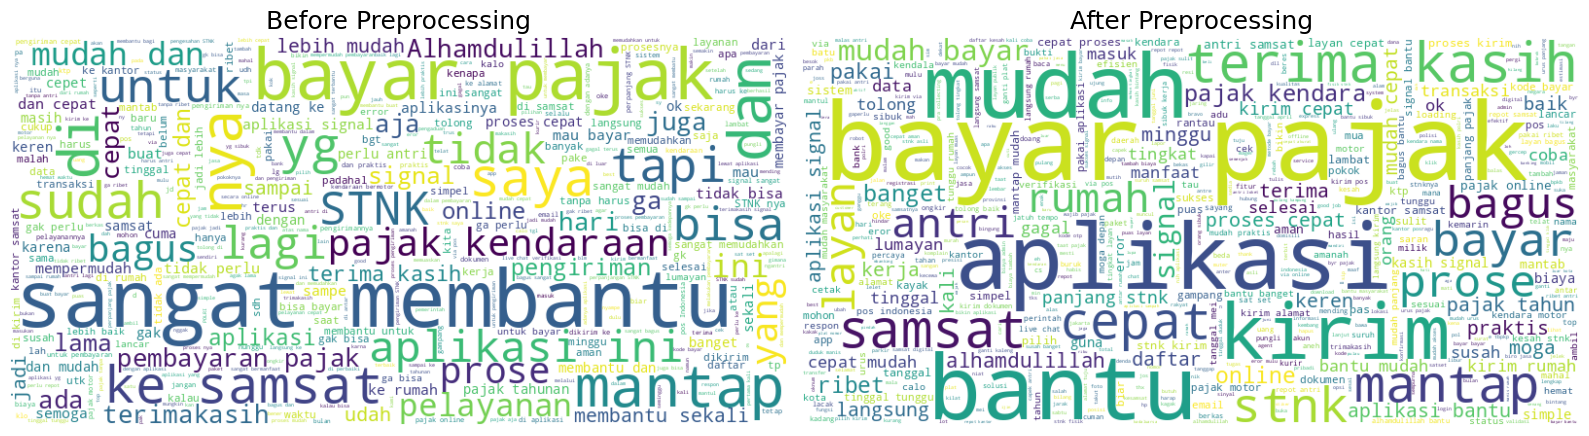

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Buat stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'sih', 'update', 'apk'])

# WordCloud Before (dari kolom 'Review Text')
text_before = ' '.join(data['Kalimat'].astype(str).tolist())
wc_before = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text_before)

# WordCloud After (dari kolom 'steming_data')
text_after = ' '.join(data['steming_data'].astype(str).tolist())
wc_after = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text_after)

# Visualisasi side-by-side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_before, interpolation='bilinear')
plt.axis("off")
plt.title("Before Preprocessing", fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(wc_after, interpolation='bilinear')
plt.axis("off")
plt.title("After Preprocessing", fontsize=18)

plt.tight_layout()
plt.show()

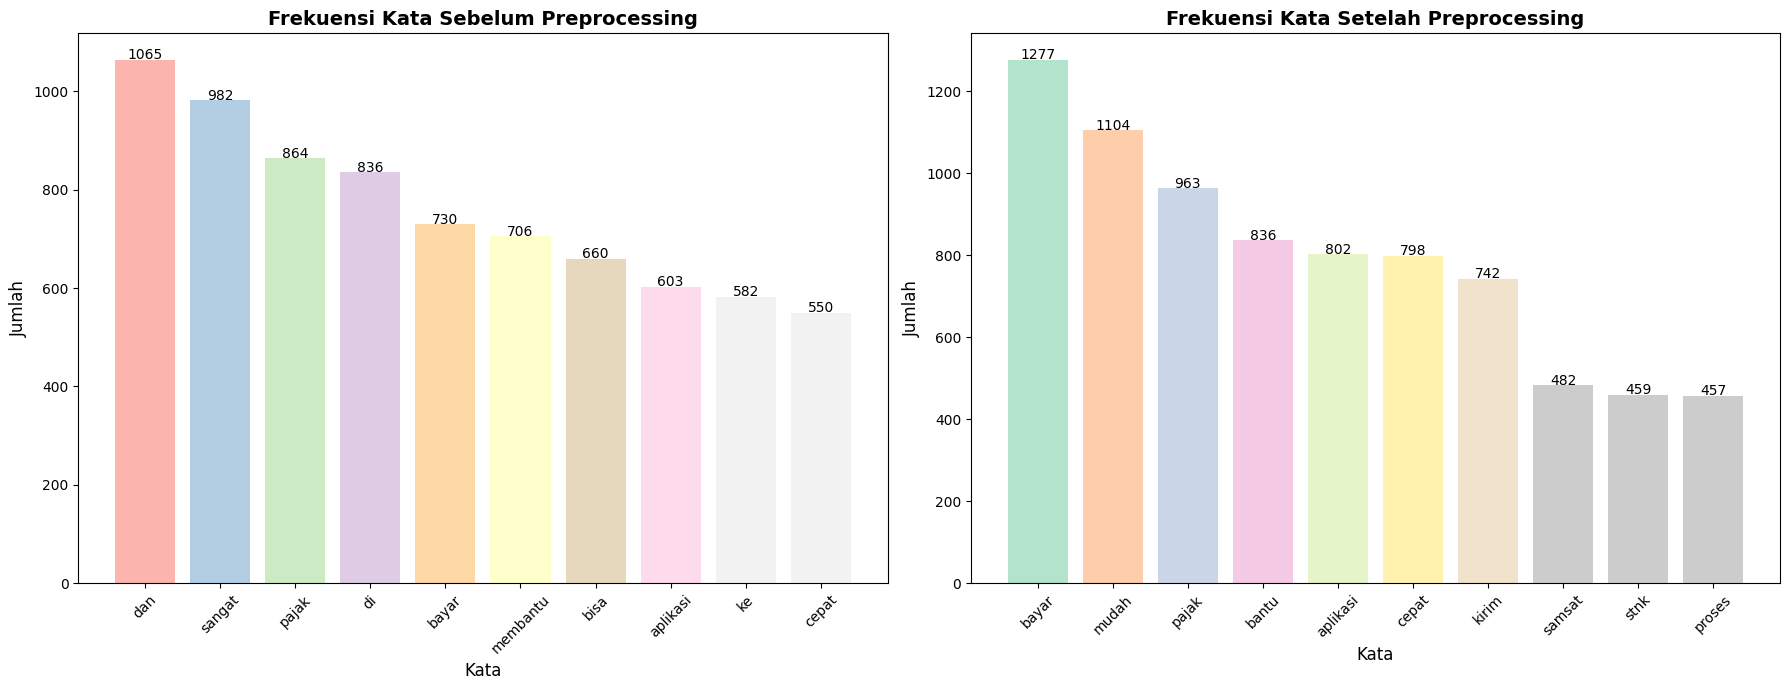

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

# Set stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue',
                 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga', 'update', 'apk'])

# --- Data Preparation ---

# BEFORE: kolom 'Review Text'
all_text_before = ' '.join(data["Kalimat"].astype(str))
words_before = all_text_before.split()
filtered_words_before = [word for word in words_before if word.lower() not in stopwords]
word_counts_before = Counter(filtered_words_before)
top_words_before = word_counts_before.most_common(10)
word_before, count_before = zip(*top_words_before)

# AFTER: kolom 'steming_data'
all_text_after = ' '.join(data["steming_data"].astype(str))
words_after = all_text_after.split()
filtered_words_after = [word for word in words_after if word.lower() not in stopwords]
word_counts_after = Counter(filtered_words_after)
top_words_after = word_counts_after.most_common(10)
word_after, count_after = zip(*top_words_after)

# --- Plotting ---

# Membuat subplot (Asumsi: 1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# BEFORE Plot
colors_before = plt.cm.Pastel1(range(len(word_before)))
bars1 = axes[0].bar(word_before, count_before, color=colors_before)
axes[0].set_title("Frekuensi Kata Sebelum Preprocessing", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Kata", fontsize=12)
axes[0].set_ylabel("Jumlah", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for bar, count in zip(bars1, count_before):
    axes[0].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

# AFTER Plot
colors_after = plt.cm.Pastel2(range(len(word_after)))
bars2 = axes[1].bar(word_after, count_after, color=colors_after)
axes[1].set_title("Frekuensi Kata Setelah Preprocessing", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Kata", fontsize=12)
axes[1].set_ylabel("Jumlah", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for bar, count in zip(bars2, count_after):
    axes[1].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

# Final layout adjustments and display
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('Hasil_Preprocessing_Data.csv', encoding='utf8', index=False)

# **PELABELAN OTOMATIS LEXCIKON**

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Preprocessing_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5557 entries, 0 to 5556
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Kalimat           5556 non-null   object
 1   cleaning          5555 non-null   object
 2   case_folding      5555 non-null   object
 3   normalisasi       5555 non-null   object
 4   tokenize          5557 non-null   object
 5   stopword removal  5557 non-null   object
 6   steming_data      5518 non-null   object
dtypes: object(7)
memory usage: 304.0+ KB


In [ ]:
# Menghapus baris dengan nilai kosong (jika ada)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5518 entries, 0 to 5556
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Kalimat           5518 non-null   object
 1   cleaning          5518 non-null   object
 2   case_folding      5518 non-null   object
 3   normalisasi       5518 non-null   object
 4   tokenize          5518 non-null   object
 5   stopword removal  5518 non-null   object
 6   steming_data      5518 non-null   object
dtypes: object(7)
memory usage: 344.9+ KB


In [ ]:
data = pd.DataFrame(data[['steming_data']])
data.head(5)

,steming_data
0,alhamdulillah mudah
1,bagus bukti stnk rumah
2,terima kasih signal
3,bayar pajak signal
4,terima kasih bapenda perintah prop lampung


In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# ======================================================================
# BAGIAN 1: PERSIAPAN DATA - MENGGABUNGKAN FILE
# ======================================================================

print("[BAGIAN 1] Mempersiapkan data final untuk model...")

try:
    # 1A. Memuat file yang berisi teks bersih hasil stemming
    df_preprocessing = pd.read_csv("Hasil_Preprocessing_Data.csv")

    # 1B. Memuat file yang berisi label sentimen
    df_labelling = pd.read_csv("hasil label manual.csv")

    print("Kedua file sumber berhasil dimuat.")
except FileNotFoundError as e:
    print(f"Error: Salah satu file tidak ditemukan. Pastikan kedua file ada: {e}")
    exit()

# 1C. Membuat DataFrame baru yang bersih untuk model
print("Menggabungkan kolom 'steming_data' dan 'Sentiment'...")
data_final_model = pd.DataFrame({
    'teks_bersih': df_preprocessing['steming_data'],
    'sentiment_label': df_labelling['Sentimen']
})

# 1D. Menghapus baris yang mungkin kosong untuk memastikan kualitas data
data_final_model = data_final_model.dropna().reset_index(drop=True)

print("DataFrame final untuk model berhasil dibuat dan siap digunakan.")
print("\nInfo DataFrame Final:")
print(data_final_model.info())

print("\nContoh Data Final:")
print(data_final_model.head())


[BAGIAN 1] Mempersiapkan data final untuk model...
Kedua file sumber berhasil dimuat.
Menggabungkan kolom 'steming_data' dan 'Sentiment'...
DataFrame final untuk model berhasil dibuat dan siap digunakan.

Info DataFrame Final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   teks_bersih      5517 non-null   object
 1   sentiment_label  5517 non-null   object
dtypes: object(2)
memory usage: 86.3+ KB
None

Contoh Data Final:
                                  teks_bersih sentiment_label
0                         alhamdulillah mudah         Positif
1                      bagus bukti stnk rumah         Positif
2                         terima kasih signal         Positif
3                          bayar pajak signal          Netral
4  terima kasih bapenda perintah prop lampung         Positif


In [ ]:
# ======================================================================
# BAGIAN 2: IMPLEMENTASI MODEL LSTM
# ======================================================================

# --- TAHAP 2A: PERSIAPAN DATA UNTUK MODEL ---
print("\n[BAGIAN 2] Memulai tahap implementasi model LSTM...")
print("\n[TAHAP 2A] Mempersiapkan data...")

# Memisahkan fitur (teks) dan target (label) dari DataFrame final
texts = data_final_model['teks_bersih'].astype(str)
labels = data_final_model['sentiment_label']

# Mengubah label sentimen (teks) menjadi angka (numerik)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
print(f"\nKelas sentimen: {label_encoder.classes_}")


# --- TAHAP 2B: PEMBAGIAN DATASET ---
print("\n[TAHAP 2B] Membagi data menjadi set pelatihan dan pengujian...")
X_train, X_test, y_train, y_test = train_test_split(
    texts,
    encoded_labels,
    test_size=0.2,
    random_state=42,
    stratify=encoded_labels
)
print(f"Ukuran data latih: {len(X_train)}")
print(f"Ukuran data uji: {len(X_test)}")



[BAGIAN 2] Memulai tahap implementasi model LSTM...

[TAHAP 2A] Mempersiapkan data...

Kelas sentimen: ['Negatif' 'Netral' 'Positif']

[TAHAP 2B] Membagi data menjadi set pelatihan dan pengujian...
Ukuran data latih: 4413
Ukuran data uji: 1104


In [ ]:
pip install keras_tuner

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification

# =================================================================
# BAGIAN 1: PERSIAPAN DATA
# =================================================================
# Muat data Anda
df_preprocessing = pd.read_csv('Hasil_Preprocessing_Data (1).csv')
df_label_manual = pd.read_csv('hasil label manual (1).csv')
merged_df = pd.merge(df_preprocessing, df_label_manual, on='Kalimat', how='inner')

# Kita akan menggunakan kolom 'Kalimat' asli karena IndoBERT lebih baik dalam memahami kalimat utuh
# Namun, pastikan tidak ada nilai null
cleaned_df = merged_df.dropna(subset=['Kalimat', 'Sentimen'])

# Ambil fitur dan label
texts = cleaned_df['Kalimat'].astype(str).tolist()
labels_string = cleaned_df['Sentimen'].tolist()

# Mapping label ke integer
label_map = {'Positif': 0, 'Negatif': 1, 'Netral': 2}
labels = [label_map[label] for label in labels_string]

# Split data
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels # Stratify penting untuk data tidak seimbang
)

# =================================================================
# BAGIAN 2: TOKENISASI DENGAN INDOBERT
# =================================================================
# Muat tokenizer IndoBERT
PRE_TRAINED_MODEL_NAME = 'indobenchmark/indobert-base-p1'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

# Tokenisasi data latih dan validasi
# BERT memerlukan format input khusus (input_ids, attention_mask)
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

# Ubah ke format dataset TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

# =================================================================
# BAGIAN 3: MEMBUAT DAN MELATIH MODEL INDOBERT
# =================================================================
print("\n--- Memuat dan Melatih Model IndoBERT ---")

# Muat model IndoBERT untuk klasifikasi dengan 3 label
model = TFBertForSequenceClassification.from_pretrained(
    PRE_TRAINED_MODEL_NAME,
    num_labels=3
)

# Tentukan optimizer dan loss function
# Learning rate yang lebih rendah (seperti 5e-5) biasanya lebih baik untuk fine-tuning
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Siapkan dataset untuk training (batching dan prefetching)
train_dataset_batched = train_dataset.shuffle(1000).batch(16)
val_dataset_batched = val_dataset.batch(16)

# Callback untuk menghentikan pelatihan jika tidak ada peningkatan
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    mode='max',
    restore_best_weights=True
)

# Latih model (fine-tuning)
# Proses ini mungkin memakan waktu lebih lama per epoch
history = model.fit(
    train_dataset_batched,
    epochs=10, # Biasanya 3-5 epoch sudah cukup untuk fine-tuning
    validation_data=val_dataset_batched,
    callbacks=[early_stopping]
)

# =================================================================
# BAGIAN 4: EVALUASI FINAL
# =================================================================
final_loss, final_accuracy = model.evaluate(val_dataset_batched)
print(f"\n[HASIL AKHIR DENGAN INDOBERT] Akurasi pada data validasi: {final_accuracy*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]


--- Memuat dan Melatih Model IndoBERT ---


tf_model.h5:   0%|          | 0.00/656M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x78f448b207d0>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Bidirectional

# =================================================================
# BAGIAN 1: PERSIAPAN DATA
# =================================================================
# Muat data Anda
df_preprocessing = pd.read_csv('Hasil_Preprocessing_Data (1).csv')
df_label_manual = pd.read_csv('hasil label manual (1).csv')
merged_df = pd.merge(df_preprocessing, df_label_manual, on='Kalimat', how='inner')
cleaned_df = merged_df.dropna(subset=['steming_data', 'Sentimen'])

# Siapkan fitur dan label
texts = cleaned_df['steming_data'].astype(str).values
labels_categorical = pd.get_dummies(cleaned_df['Sentimen']).values
labels_order = pd.get_dummies(cleaned_df['Sentimen']).columns # Simpan urutan label

# Split data
X_train_text, X_val_text, y_train, y_val = train_test_split(
    texts, labels_categorical, test_size=0.2, random_state=42
)

# Tokenisasi dan Padding
vocab_size = 10000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

X_train = pad_sequences(tokenizer.texts_to_sequences(X_train_text), maxlen=max_length, padding='post')
X_val = pad_sequences(tokenizer.texts_to_sequences(X_val_text), maxlen=max_length, padding='post')

# =================================================================
# BAGIAN 2: MEMBUAT DAN MELATIH DUA MODEL BERBEDA
# =================================================================
print("--- Melatih Model Ahli 1: LSTM ---")
# Model 1: Arsitektur LSTM
model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64),
    Bidirectional(LSTM(96)),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), verbose=1)

print("\n--- Melatih Model Ahli 2: GRU ---")
# Model 2: Arsitektur GRU
model_gru = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64),
    Bidirectional(GRU(96)), # Menggunakan GRU sebagai ganti LSTM
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model_gru.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_gru.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), verbose=1)

# =================================================================
# BAGIAN 3: MENGGUNAKAN ENSEMBLE UNTUK PREDIKSI
# =================================================================
# Kalimat baru untuk diuji
kalimat_baru_untuk_tes = [
    "aplikasinya bagus tapi pengirimannya lama sekali",
    "terima kasih signal, sangat memudahkan bayar pajak tahunan",
    "kenapa sekarang tidak bisa login, selalu gagal"
]

# Pra-pemrosesan kalimat baru
padded_new = pad_sequences(tokenizer.texts_to_sequences(kalimat_baru_untuk_tes), maxlen=max_length, padding='post')

# Dapatkan prediksi dari kedua model
pred_lstm = model_lstm.predict(padded_new)
pred_gru = model_gru.predict(padded_new)

# Ambil label prediksi (indeks dengan nilai tertinggi) dari setiap model
pred_labels_lstm = np.argmax(pred_lstm, axis=1)
pred_labels_gru = np.argmax(pred_gru, axis=1)

print("\n================ HASIL PREDIKSI ENSEMBLE ================")
for i in range(len(kalimat_baru_untuk_tes)):
    vote_lstm = labels_order[pred_labels_lstm[i]]
    vote_gru = labels_order[pred_labels_gru[i]]

    # Logika Voting Sederhana
    # Jika suara sama, itu hasilnya. Jika berbeda, kita bisa pilih salah satu atau abstain.
    # Untuk contoh ini, kita tampilkan suara masing-masing.
    final_prediction = vote_lstm if vote_lstm == vote_gru else f"Ragu-ragu ({vote_lstm} / {vote_gru})"

    print(f"Kalimat: '{kalimat_baru_untuk_tes[i]}'")
    print(f"-> Prediksi LSTM: {vote_lstm}")
    print(f"-> Prediksi GRU : {vote_gru}")
    print(f"--> Hasil Akhir Ensemble: {final_prediction}\n")

--- Melatih Model Ahli 1: LSTM ---
Epoch 1/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 28s 145ms/step - accuracy: 0.7090 - loss: 0.7521 - val_accuracy: 0.8027 - val_loss: 0.5532
Epoch 2/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - accuracy: 0.8673 - loss: 0.3853 - val_accuracy: 0.8609 - val_loss: 0.4012
Epoch 3/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - accuracy: 0.8910 - loss: 0.2961 - val_accuracy: 0.8518 - val_loss: 0.4109
Epoch 4/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - accuracy: 0.9178 - loss: 0.2247 - val_accuracy: 0.8609 - val_loss: 0.4166
Epoch 5/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 41s 156ms/step - accuracy: 0.9390 - loss: 0.1742 - val_accuracy: 0.8518 - val_loss: 0.4452

--- Melatih Model Ahli 2: GRU ---
Epoch 1/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 29s 161ms/step - accuracy: 0.7318 - loss: 0.7445 - val_accuracy: 0.8355 - val_loss: 0.4402
Epoch 2/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 42s 171ms/step - accuracy: 0.8575 - loss: 0.3827 - val_accuracy: 0.8536 - val_loss: 0.4143
Epoch 3/5
138/138 ━━

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Bidirectional

# =================================================================
# BAGIAN 1: PERSIAPAN DATA & MODEL (SETUP SEKALI JALAN)
# =================================================================
print("--- Melakukan setup awal: Mempersiapkan data dan melatih model ahli... ---")

# Muat data asli Anda
df_preprocessing = pd.read_csv('Hasil_Preprocessing_Data (1).csv')
df_label_manual = pd.read_csv('hasil label manual (1).csv')
merged_df = pd.merge(df_preprocessing, df_label_manual, on='Kalimat', how='inner')
cleaned_df = merged_df.dropna(subset=['steming_data', 'Sentimen'])

# Siapkan fitur dan label
texts = cleaned_df['steming_data'].astype(str).values
labels_categorical = pd.get_dummies(cleaned_df['Sentimen']).values
labels_order = pd.get_dummies(cleaned_df['Sentimen']).columns # Simpan urutan label untuk nanti

# Tokenisasi dan Padding
vocab_size = 10000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts) # Tokenizer disiapkan dengan seluruh data teks

padded_sequences = pad_sequences(tokenizer.texts_to_sequences(texts), maxlen=max_length, padding='post')

# --- Melatih Model Ahli 1: LSTM ---
# Menggunakan seluruh data untuk melatih model final
model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64),
    Bidirectional(LSTM(96)),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(padded_sequences, labels_categorical, epochs=5, verbose=0) # verbose=0 agar ringkas
print("Model Ahli 1 (LSTM) telah siap.")

# --- Melatih Model Ahli 2: GRU ---
# Menggunakan seluruh data untuk melatih model final
model_gru = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64),
    Bidirectional(GRU(96)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_gru.fit(padded_sequences, labels_categorical, epochs=5, verbose=0) # verbose=0 agar ringkas
print("Model Ahli 2 (GRU) telah siap.")
print("--- Setup Selesai. Alat prediksi sentimen siap digunakan. ---\n")


# =================================================================
# BAGIAN 2: FUNGSI PREDIKSI (INILAH ALAT ANDA)
# =================================================================
def prediksi_sentimen_ensemble(kalimat_baru):
    """
    Fungsi ini mengambil satu atau beberapa kalimat dan mengembalikan
    prediksi sentimen dari panel ahli (ensemble).
    """
    if not isinstance(kalimat_baru, list):
        kalimat_baru = [kalimat_baru]

    # Pra-pemrosesan kalimat baru
    padded_new = pad_sequences(tokenizer.texts_to_sequences(kalimat_baru), maxlen=max_length, padding='post')

    # Dapatkan prediksi dari kedua model
    pred_lstm = model_lstm.predict(padded_new, verbose=0)
    pred_gru = model_gru.predict(padded_new, verbose=0)

    # Ambil label prediksi dari setiap model
    pred_labels_lstm = np.argmax(pred_lstm, axis=1)
    pred_labels_gru = np.argmax(pred_gru, axis=1)

    # Tampilkan hasil
    print("================ HASIL PREDIKSI SENTIMEN ================")
    for i in range(len(kalimat_baru)):
        vote_lstm = labels_order[pred_labels_lstm[i]]
        vote_gru = labels_order[pred_labels_gru[i]]

        # Logika Voting: Jika suara sama, itu hasilnya. Jika berbeda, kita bisa tandai sebagai "ragu-ragu".
        final_prediction = vote_lstm if vote_lstm == vote_gru else f"Ragu-ragu ({vote_lstm} / {vote_gru})"

        print(f"Kalimat: '{kalimat_baru[i]}'")
        print(f"-> Prediksi LSTM: {vote_lstm}")
        print(f"-> Prediksi GRU : {vote_gru}")
        print(f"--> Keputusan Panel Ahli: {final_prediction}\n")
    print("=========================================================")

# =================================================================
# BAGIAN 3: CONTOH PENGGUNAAN
# =================================================================

# Tulis kalimat apa saja yang ingin Anda uji di sini
kalimat_untuk_dites = [
    "mantap, prosesnya cepat dan tidak ribet sama sekali",
    "aplikasinya sering error dan tidak bisa dibuka",
    "pengirimannya standar, tidak terlalu cepat tapi tidak lama juga",
    "biaya adminnya mahal banget"
]

# Panggil fungsi prediksi
prediksi_sentimen_ensemble(kalimat_untuk_dites)

--- Melakukan setup awal: Mempersiapkan data dan melatih model ahli... ---
Model Ahli 1 (LSTM) telah siap.
Model Ahli 2 (GRU) telah siap.
--- Setup Selesai. Alat prediksi sentimen siap digunakan. ---

================ HASIL PREDIKSI SENTIMEN ================
Kalimat: 'mantap, prosesnya cepat dan tidak ribet sama sekali'
-> Prediksi LSTM: Positif
-> Prediksi GRU : Positif
--> Keputusan Panel Ahli: Positif

Kalimat: 'aplikasinya sering error dan tidak bisa dibuka'
-> Prediksi LSTM: Positif
-> Prediksi GRU : Negatif
--> Keputusan Panel Ahli: Ragu-ragu (Positif / Negatif)

Kalimat: 'pengirimannya standar, tidak terlalu cepat tapi tidak lama juga'
-> Prediksi LSTM: Positif
-> Prediksi GRU : Positif
--> Keputusan Panel Ahli: Positif

Kalimat: 'biaya adminnya mahal banget'
-> Prediksi LSTM: Negatif
-> Prediksi GRU : Negatif
--> Keputusan Panel Ahli: Negatif



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

# =================================================================
# BAGIAN 1: PERSIAPAN DATA
# =================================================================
df_preprocessing = pd.read_csv('Hasil_Preprocessing_Data (1).csv')
df_label_manual = pd.read_csv('hasil label manual (1).csv')
merged_df = pd.merge(df_preprocessing, df_label_manual, on='Kalimat', how='inner')
cleaned_df = merged_df.dropna(subset=['steming_data', 'Sentimen'])

# Pisahkan fitur dan label
texts = cleaned_df['steming_data'].astype(str).values
labels_string = cleaned_df['Sentimen'].values
labels_categorical = pd.get_dummies(labels_string).values

# Split data
X_train_full, X_val, y_train_full, y_val = train_test_split(
    texts, labels_categorical, test_size=0.2, random_state=42
)

# Tokenisasi
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_full)
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train_full), maxlen=100, padding='post')
X_val = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=100, padding='post')

# =================================================================
# BAGIAN 2: MENGHITUNG CLASS WEIGHT
# =================================================================
# Ini akan memberikan "bobot" lebih pada kelas minoritas (Negatif & Netral)
y_integers = np.argmax(y_train_full, axis=1)
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_integers),
    y=y_integers
)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights yang akan digunakan:", class_weights_dict)

# =================================================================
# BAGIAN 3: MELATIH MODEL TERBAIK DENGAN STRATEGI BARU
# =================================================================
print("\n--- Melatih model dengan hyperparameter terbaik + class weights ---")

# Gunakan hyperparameter terbaik dari KerasTuner
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64), # Dari tuner
    Bidirectional(LSTM(96)), # Dari tuner
    Dense(128, activation='relu'), # Dari tuner
    Dropout(0.2), # Dari tuner
    Dense(3, activation='softmax')
])

# Optimizer dengan learning rate terbaik
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) # Dari tuner

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback untuk menyimpan model terbaik saja
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', # Monitor akurasi validasi
    patience=5,             # Beri waktu 5 epoch untuk peningkatan
    mode='max',             # Kita ingin memaksimalkan akurasi
    restore_best_weights=True # WAJIB: Otomatis kembalikan bobot terbaik
)

history = model.fit(
    X_train,
    y_train_full,
    epochs=50,
    validation_data=(X_val, y_val),
    class_weight=class_weights_dict, # Terapkan class weights di sini
    callbacks=[early_stopping]
)

# =================================================================
# BAGIAN 4: EVALUASI FINAL
# =================================================================
final_loss, final_accuracy = model.evaluate(X_val, y_val)
print(f"\n[HASIL AKHIR SETELAH PERBAIKAN] Akurasi pada data validasi: {final_accuracy*100:.2f}%")

Class Weights yang akan digunakan: {0: np.float64(1.2767131242740999), 1: np.float64(5.071510957324106), 2: np.float64(0.4951576576576577)}

--- Melatih model dengan hyperparameter terbaik + class weights ---
Epoch 1/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 32s 176ms/step - accuracy: 0.6305 - loss: 0.9541 - val_accuracy: 0.7691 - val_loss: 0.6511
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 38s 157ms/step - accuracy: 0.8545 - loss: 0.4788 - val_accuracy: 0.8064 - val_loss: 0.6002
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.9037 - loss: 0.3270 - val_accuracy: 0.7773 - val_loss: 0.6655
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 22s 157ms/step - accuracy: 0.9076 - loss: 0.2572 - val_accuracy: 0.7873 - val_loss: 0.6559
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.9323 - loss: 0.1796 - val_accuracy: 0.8236 - val_loss: 0.6424
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 22s 157ms/step - accuracy: 0.9419 - loss: 0.1354 - val_accuracy: 0.7555 - val_loss: 1.0989
Epoch

In [ ]:
# Pastikan KerasTuner sudah terinstall
# pip install keras-tuner
import pandas as pd
import numpy as np
import keras_tuner as kt
import tensorflow as tf  # <--- IMPORT YANG HILANG
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential  # <--- IMPORT YANG HILANG
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

# =================================================================
# BAGIAN 1: PERSIAPAN DATA (Sama seperti sebelumnya)
# =================================================================
df_preprocessing = pd.read_csv('Hasil_Preprocessing_Data (1).csv')
df_label_manual = pd.read_csv('hasil label manual (1).csv')
merged_df = pd.merge(df_preprocessing, df_label_manual, on='Kalimat', how='inner')
cleaned_df = merged_df.dropna(subset=['steming_data', 'Sentimen'])
texts = cleaned_df['steming_data'].astype(str).values
labels = pd.get_dummies(cleaned_df['Sentimen']).values
X_train_full, X_val, y_train_full, y_val = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenisasi
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_full)

X_train_seq = tokenizer.texts_to_sequences(X_train_full)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Padding
max_length = 100
X_train = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val = pad_sequences(X_val_seq, maxlen=max_length, padding='post')


# =================================================================
# BAGIAN 2: MEMBUAT FUNGSI BUILDER MODEL UNTUK KERASTUNER
# =================================================================
def build_model(hp):
    """
    Fungsi ini mendefinisikan ruang pencarian hyperparameter.
    KerasTuner akan mencoba berbagai nilai yang kita tentukan di sini.
    """
    model = Sequential()

    # 1. Tuning dimensi embedding
    hp_embedding_dim = hp.Int('embedding_dim', min_value=16, max_value=128, step=16)
    model.add(Embedding(input_dim=vocab_size, output_dim=hp_embedding_dim))

    # 2. Tuning unit LSTM
    hp_lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=32)
    model.add(Bidirectional(LSTM(units=hp_lstm_units)))

    # 3. Tuning unit Dense dan Dropout
    hp_dense_units = hp.Int('dense_units', min_value=32, max_value=128, step=32)
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    model.add(Dense(units=hp_dense_units, activation='relu'))
    model.add(Dropout(rate=hp_dropout_rate))

    model.add(Dense(3, activation='softmax'))

    # 4. Tuning learning rate optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# =================================================================
# BAGIAN 3: MENJALANKAN PENCARIAN HYPERPARAMETER
# =================================================================
# Inisialisasi tuner
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='sentiment_tuning_v2') # Ganti nama project agar tidak error

# Membuat callback untuk menghentikan jika tidak ada peningkatan
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

print("\n--- Memulai Pencarian Hyperparameter Terbaik ---")
# Jalankan pencarian
tuner.search(X_train, y_train_full, epochs=20, validation_data=(X_val, y_val), callbacks=[stop_early])

# Dapatkan hyperparameter terbaik
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Pencarian Selesai.
Hyperparameter terbaik yang ditemukan:
- Embedding Dim: {best_hps.get('embedding_dim')}
- LSTM Units: {best_hps.get('lstm_units')}
- Dense Units: {best_hps.get('dense_units')}
- Dropout Rate: {best_hps.get('dropout_rate')}
- Learning Rate: {best_hps.get('learning_rate')}
""")


# =================================================================
# BAGIAN 4: MELATIH MODEL FINAL DENGAN PARAMETER TERBAIK
# =================================================================
print("\n--- Melatih Model Final dengan Hyperparameter Terbaik ---")
# Bangun model dengan hyperparameter terbaik dan latih dengan data penuh
model_final = tuner.hypermodel.build(best_hps)
history = model_final.fit(X_train, y_train_full, epochs=50, validation_data=(X_val, y_val), callbacks=[stop_early])

# Evaluasi final
eval_result = model_final.evaluate(X_val, y_val)
print(f"\n[HASIL AKHIR] Akurasi pada data validasi: {eval_result[1]*100:.2f}%")

Trial 30 Complete [00h 01m 24s]
val_accuracy: 0.857272744178772

Best val_accuracy So Far: 0.8663636445999146
Total elapsed time: 00h 51m 03s

Pencarian Selesai.
Hyperparameter terbaik yang ditemukan:
- Embedding Dim: 64
- LSTM Units: 96
- Dense Units: 128
- Dropout Rate: 0.2
- Learning Rate: 0.01


--- Melatih Model Final dengan Hyperparameter Terbaik ---
Epoch 1/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 26s 157ms/step - accuracy: 0.7341 - loss: 0.7142 - val_accuracy: 0.8436 - val_loss: 0.4322
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - accuracy: 0.8966 - loss: 0.3019 - val_accuracy: 0.8427 - val_loss: 0.4378
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 40s 150ms/step - accuracy: 0.9347 - loss: 0.2022 - val_accuracy: 0.8327 - val_loss: 0.4235
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 41s 153ms/step - accuracy: 0.9425 - loss: 0.1686 - val_accuracy: 0.8491 - val_loss: 0.5386
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 43s 169ms/step - accuracy: 0.9559 - loss: 0.1262 - val_accuracy: 0.8400 - val


--- Membangun Model yang Ditingkatkan dengan Dropout dan EarlyStopping ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Memulai Pelatihan Model Baru ---
Epoch 1/20
138/138 - 45s - 330ms/step - accuracy: 0.6645 - loss: 0.7958 - val_accuracy: 0.8300 - val_loss: 0.5157
Epoch 2/20
138/138 - 40s - 287ms/step - accuracy: 0.8308 - loss: 0.4926 - val_accuracy: 0.8282 - val_loss: 0.4777
Epoch 3/20
138/138 - 41s - 300ms/step - accuracy: 0.8633 - loss: 0.4007 - val_accuracy: 0.8382 - val_loss: 0.4411
Epoch 4/20
138/138 - 38s - 278ms/step - accuracy: 0.8849 - loss: 0.3368 - val_accuracy: 0.8445 - val_loss: 0.4448
Epoch 5/20
138/138 - 41s - 297ms/step - accuracy: 0.8945 - loss: 0.3040 - val_accuracy: 0.8291 - val_loss: 0.4423
Epoch 6/20
138/138 - 42s - 305ms/step - accuracy: 0.9024 - loss: 0.2836 - val_accuracy: 0.8409 - val_loss: 0.4638

Pelatihan model selesai!

Akurasi Akhir pada data uji (Model Baru): 83.82%


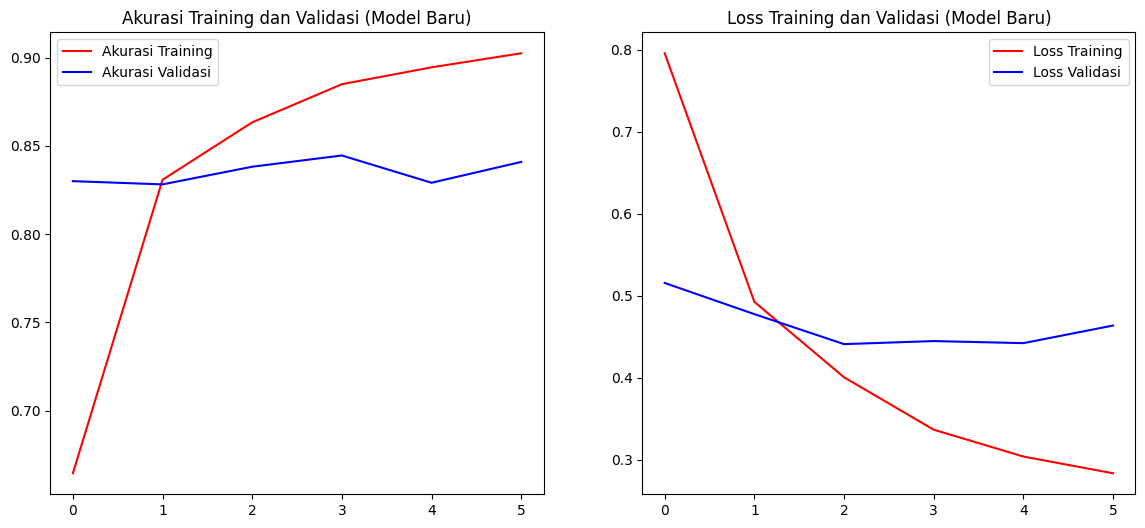

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# =================================================================
# BAGIAN 1: PERSIAPAN DATA (Tidak ada perubahan)
# =================================================================
# Memuat dan menggabungkan data
df_preprocessing = pd.read_csv('Hasil_Preprocessing_Data (1).csv')
df_label_manual = pd.read_csv('hasil label manual (1).csv')
merged_df = pd.merge(df_preprocessing, df_label_manual, on='Kalimat', how='inner')

# Membersihkan data
cleaned_df = merged_df.dropna(subset=['steming_data', 'Sentimen'])
texts = cleaned_df['steming_data'].astype(str).values
labels = cleaned_df['Sentimen'].values

# Tokenisasi dan Padding
vocab_size = 10000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Encoding Label
label_map = {'Positif': 0, 'Negatif': 1, 'Netral': 2}
integer_labels = np.array([label_map[label] for label in labels])
one_hot_labels = to_categorical(integer_labels)

# Pembagian Dataset
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    one_hot_labels,
    test_size=0.2,
    random_state=42
)

# =================================================================
# BAGIAN 2: MEMBANGUN MODEL YANG DISEMPURNAKAN
# =================================================================

print("\n--- Membangun Model yang Ditingkatkan dengan Dropout dan EarlyStopping ---")

# --- Membangun Arsitektur Model ---
embedding_dim = 16

model_revised = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    Bidirectional(LSTM(64, return_sequences=True)), # `return_sequences=True` diperlukan untuk lapisan LSTM berikutnya
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.5), # Lapisan Dropout untuk mengurangi overfitting. 50% neuron akan di-nonaktifkan secara acak saat training.
    Dense(3, activation='softmax')
])

# --- Compile Model ---
model_revised.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# --- Menyiapkan Callback EarlyStopping ---
# Ini akan menghentikan training jika 'val_loss' tidak membaik selama 3 epoch berturut-turut.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True # Mengembalikan bobot dari epoch terbaik
)

# Menampilkan ringkasan arsitektur model
model_revised.summary()


# =================================================================
# BAGIAN 3: MELATIH DAN MENGEVALUASI MODEL BARU
# =================================================================
print("\n--- Memulai Pelatihan Model Baru ---")

num_epochs = 20 # Kita bisa set epoch lebih banyak, karena EarlyStopping akan berhenti otomatis
history_revised = model_revised.fit(
    X_train,
    y_train,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping], # Terapkan callback di sini
    verbose=2
)

print("\nPelatihan model selesai!")

# --- Mengevaluasi Model ---
loss, accuracy = model_revised.evaluate(X_test, y_test, verbose=0)
print(f"\nAkurasi Akhir pada data uji (Model Baru): {accuracy*100:.2f}%")


# =================================================================
# BAGIAN 4: VISUALISASI HASIL
# =================================================================
acc = history_revised.history['accuracy']
val_acc = history_revised.history['val_accuracy']
loss = history_revised.history['loss']
val_loss = history_revised.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'r', label='Akurasi Training')
plt.plot(epochs_range, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi (Model Baru)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'r', label='Loss Training')
plt.plot(epochs_range, val_loss, 'b', label='Loss Validasi')
plt.title('Loss Training dan Validasi (Model Baru)')
plt.legend()

plt.show()

# **MODEL PERTAMA**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# --- 1. Muat dan Gabungkan Data (Langkah dari analisis sebelumnya) ---
# Saya asumsikan kita sudah memiliki dataframe gabungan 'merged_df'
# Untuk tujuan demonstrasi, saya akan memuat ulang dan menggabungkannya
df_preprocessing = pd.read_csv('Hasil_Preprocessing_Data (1).csv')
df_label_manual = pd.read_csv('hasil label manual (1).csv')
merged_df = pd.merge(df_preprocessing, df_label_manual, on='Kalimat', how='inner')

# --- 2. Pembersihan Data ---
# Hapus baris di mana 'steming_data' atau 'Sentimen' kosong
cleaned_df = merged_df.dropna(subset=['steming_data', 'Sentimen'])

# Ambil kolom yang relevan
texts = cleaned_df['steming_data'].astype(str).values
labels = cleaned_df['Sentimen'].values

# --- 3. Persiapan Fitur Teks (Tokenization, Sequencing, Padding) ---
# Inisialisasi Tokenizer
vocab_size = 10000  # Ukuran kosakata (jumlah kata unik yang akan dipertimbangkan)
oov_token = "<OOV>" # Token untuk kata yang tidak ada di kosakata
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

# Buat kamus kata berdasarkan data teks
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

# Ubah teks menjadi urutan integer
sequences = tokenizer.texts_to_sequences(texts)

# Padding untuk menyeragamkan panjang urutan
max_length = 100 # Panjang maksimum sebuah kalimat (bisa disesuaikan)
padding_type = 'post' # Tambahkan padding di akhir
trunc_type = 'post' # Potong urutan dari akhir
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# --- 4. Persiapan Label (One-Hot Encoding) ---
# Pertama, ubah label string ke integer
label_map = {'Positif': 0, 'Negatif': 1, 'Netral': 2}
integer_labels = np.array([label_map[label] for label in labels])

# Kemudian, lakukan one-hot encoding
one_hot_labels = to_categorical(integer_labels)

# --- 5. Pembagian Dataset ---
# Bagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    one_hot_labels,
    test_size=0.2,
    random_state=42
)

# --- Hasil Akhir ---
# Data siap untuk dimasukkan ke model LSTM
print("Bentuk data latih (fitur):", X_train.shape)
print("Bentuk data uji (fitur):", X_test.shape)
print("\nBentuk data latih (label):", y_train.shape)
print("Bentuk data uji (label):", y_test.shape)

print("\nContoh fitur data latih (setelah padding):")
print(X_train[0])

print("\nContoh label data latih (setelah one-hot encoding):")
print(y_train[0])

Bentuk data latih (fitur): (4397, 100)
Bentuk data uji (fitur): (1100, 100)

Bentuk data latih (label): (4397, 3)
Bentuk data uji (label): (1100, 3)

Contoh fitur data latih (setelah padding):
[65  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]

Contoh label data latih (setelah one-hot encoding):
[1. 0. 0.]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

# =================================================================
# BAGIAN 1: PERSIAPAN DATA (Sama seperti sebelumnya)
# =================================================================
# Memuat dan menggabungkan data
df_preprocessing = pd.read_csv('Hasil_Preprocessing_Data (1).csv')
df_label_manual = pd.read_csv('hasil label manual (1).csv')
merged_df = pd.merge(df_preprocessing, df_label_manual, on='Kalimat', how='inner')

# Membersihkan data
cleaned_df = merged_df.dropna(subset=['steming_data', 'Sentimen'])
texts = cleaned_df['steming_data'].astype(str).values
labels = cleaned_df['Sentimen'].values

# Tokenisasi dan Padding
vocab_size = 10000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Encoding Label
label_map = {'Positif': 0, 'Negatif': 1, 'Netral': 2}
integer_labels = np.array([label_map[label] for label in labels])
one_hot_labels = to_categorical(integer_labels)

# Pembagian Dataset
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    one_hot_labels,
    test_size=0.2,
    random_state=42
)

# =================================================================
# BAGIAN 2: MEMBANGUN, MELATIH, DAN MENGEVALUASI MODEL LSTM
# =================================================================

# --- Membangun Arsitektur Model ---
embedding_dim = 16  # Dimensi vektor untuk setiap kata

model = Sequential([
    # 1. Embedding Layer: Mengubah input angka menjadi vektor
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),

    # 2. LSTM Layer: Memproses data sekuensial
    #    Bidirectional membuat LSTM memproses urutan dari depan ke belakang dan sebaliknya,
    #    sehingga dapat menangkap konteks dengan lebih baik.
    Bidirectional(LSTM(64)),

    # 3. Output Layer: Klasifikasi ke 3 kelas sentimen (Positif, Negatif, Netral)
    Dense(3, activation='softmax')
])

# --- Compile Model ---
# Menentukan bagaimana model akan belajar
model.compile(
    loss='categorical_crossentropy',  # Cocok untuk klasifikasi multi-kelas
    optimizer='adam',                 # Optimizer yang populer dan efektif
    metrics=['accuracy']              # Metrik yang ingin dipantau
)

# Menampilkan ringkasan arsitektur model
model.summary()

# --- Melatih Model (Training) ---
num_epochs = 10
history = model.fit(
    X_train,
    y_train,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
    verbose=2 # Menampilkan log untuk setiap epoch
)

print("\nPelatihan model selesai!")

# --- Mengevaluasi Model ---
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nAkurasi pada data uji: {accuracy*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
138/138 - 17s - 123ms/step - accuracy: 0.6918 - loss: 0.7490 - val_accuracy: 0.8164 - val_loss: 0.5210
Epoch 2/10
138/138 - 11s - 83ms/step - accuracy: 0.8388 - loss: 0.4418 - val_accuracy: 0.8509 - val_loss: 0.4364
Epoch 3/10
138/138 - 21s - 152ms/step - accuracy: 0.8710 - loss: 0.3683 - val_accuracy: 0.8564 - val_loss: 0.4216
Epoch 4/10
138/138 - 21s - 151ms/step - accuracy: 0.8838 - loss: 0.3267 - val_accuracy: 0.8555 - val_loss: 0.4186
Epoch 5/10
138/138 - 20s - 147ms/step - accuracy: 0.8915 - loss: 0.2945 - val_accuracy: 0.8555 - val_loss: 0.4274
Epoch 6/10
138/138 - 21s - 152ms/step - accuracy: 0.9027 - loss: 0.2659 - val_accuracy: 0.8573 - val_loss: 0.4387
Epoch 7/10
138/138 - 20s - 144ms/step - accuracy: 0.9118 - loss: 0.2400 - val_accuracy: 0.8536 - val_loss: 0.4606
Epoch 8/10
138/138 - 21s - 154ms/step - accuracy: 0.9261 - loss: 0.2121 - val_accuracy: 0.8382 - val_loss: 0.4751
Epoch 9/10
138/138 - 20s - 147ms/step - accuracy: 0.9356 - loss: 0.1867 - val_accuracy: 0

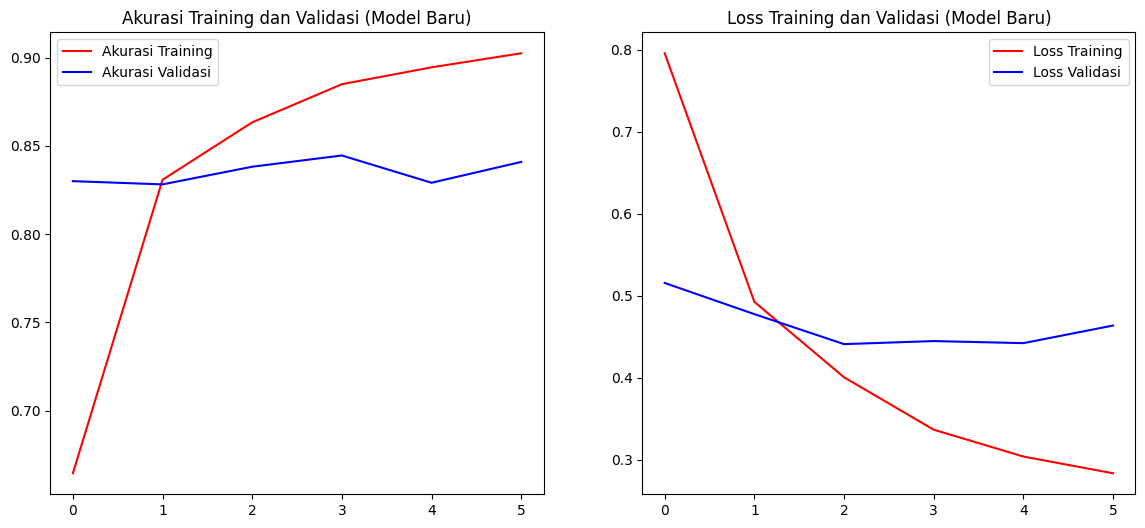

In [ ]:
acc = history_revised.history['accuracy']
val_acc = history_revised.history['val_accuracy']
loss = history_revised.history['loss']
val_loss = history_revised.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'r', label='Akurasi Training')
plt.plot(epochs_range, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi (Model Baru)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'r', label='Loss Training')
plt.plot(epochs_range, val_loss, 'b', label='Loss Validasi')
plt.title('Loss Training dan Validasi (Model Baru)')
plt.legend()

plt.show()

# **TESTING DATA**

In [ ]:
print("\nMapping Label Encoder:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{i}: {class_name}")


Mapping Label Encoder:
0: Negatif
1: Netral
2: Positif



Distribusi Kelas di Data Training:
0    1161
1     284
2    2968
Name: count, dtype: int64

Distribusi Kelas di Data Testing:
0    291
1     71
2    742
Name: count, dtype: int64


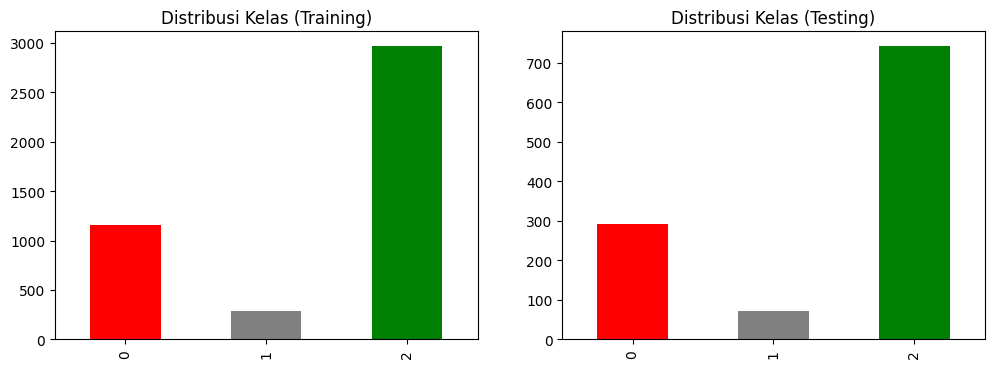

In [ ]:
import pandas as pd

print("\nDistribusi Kelas di Data Training:")
train_dist = pd.Series(y_train).value_counts().sort_index()
print(train_dist)

print("\nDistribusi Kelas di Data Testing:")
test_dist = pd.Series(y_test).value_counts().sort_index()
print(test_dist)

# Visualisasi
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
train_dist.plot(kind='bar', ax=ax[0], title='Distribusi Kelas (Training)', color=['red', 'gray', 'green'])
test_dist.plot(kind='bar', ax=ax[1], title='Distribusi Kelas (Testing)', color=['red', 'gray', 'green'])
plt.show()

In [ ]:
print("\nPersentase Kelas di Data Training:")
print(train_dist / len(y_train) * 100)

print("\nPersentase Kelas di Data Testing:")
print(test_dist / len(y_test) * 100)


Persentase Kelas di Data Training:
0    26.308634
1     6.435531
2    67.255835
Name: count, dtype: float64

Persentase Kelas di Data Testing:
0    26.358696
1     6.431159
2    67.210145
Name: count, dtype: float64


In [ ]:
import pandas as pd

print("\nDistribusi Kelas di Data Training:")
print(pd.Series(y_train).value_counts())

print("\nDistribusi Kelas di Data Testing:")
print(pd.Series(y_test).value_counts())


Distribusi Kelas di Data Training:
2    2968
0    1161
1     284
Name: count, dtype: int64

Distribusi Kelas di Data Testing:
2    742
0    291
1     71
Name: count, dtype: int64


In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2]}
print("Class Weights:", class_weights)

Class Weights: {0: np.float64(1.2670111972437554), 1: np.float64(5.179577464788732), 2: np.float64(0.4956199460916442)}


# **KODR PERTAMA**

In [ ]:
# --- TAHAP 2C: TOKENISASI DAN PADDING TEKS ---
print("\n[TAHAP 2C] Melakukan tokenisasi dan padding...")
vocab_size = 10000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


# --- TAHAP 2D: MEMBANGUN MODEL BI-LSTM ---
print("\n[TAHAP 2D] Membangun arsitektur model Bi-LSTM...")
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


# --- TAHAP 2E: MELATIH MODEL ---
print("\n[TAHAP 2E] Memulai pelatihan model...")
history = model.fit(
    X_train_padded,
    y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_padded, y_test),
    verbose=1
)
print("Pelatihan selesai!")



[TAHAP 2C] Melakukan tokenisasi dan padding...

[TAHAP 2D] Membangun arsitektur model Bi-LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


[TAHAP 2E] Memulai pelatihan model...
Epoch 1/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 49s 281ms/step - accuracy: 0.6586 - loss: 0.8533 - val_accuracy: 0.6721 - val_loss: 0.7929
Epoch 2/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 43s 301ms/step - accuracy: 0.6772 - loss: 0.7769 - val_accuracy: 0.6658 - val_loss: 0.7770
Epoch 3/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 80s 286ms/step - accuracy: 0.7099 - loss: 0.7367 - val_accuracy: 0.6703 - val_loss: 0.7856
Epoch 4/5
 68/138 ━━━━━━━━━━━━━━━━━━━━ 18s 265ms/step - accuracy: 0.7312 - loss: 0.7068

KeyboardInterrupt: 


[TAHAP 2F] Mengevaluasi performa model...
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step
Akurasi Model: 61.96%

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.39      0.19      0.25       291
      Netral       0.04      0.04      0.04        71
     Positif       0.70      0.84      0.77       742

    accuracy                           0.62      1104
   macro avg       0.38      0.36      0.35      1104
weighted avg       0.58      0.62      0.58      1104

Confusion Matrix:


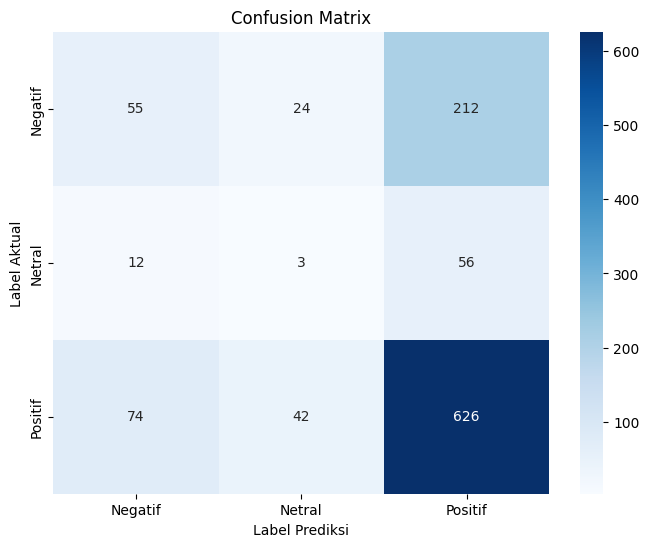

In [ ]:
# --- TAHAP 2F: EVALUASI MODEL ---
print("\n[TAHAP 2F] Mengevaluasi performa model...")
y_pred_prob = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Akurasi Model: {accuracy * 100:.2f}%\n")

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Label Aktual')
plt.xlabel('Label Prediksi')
plt.show()

💡 [BAGIAN 0] Setup awal dan persiapan fungsi...
Kamus leksikon positif dan negatif berhasil diunduh.

[BAGIAN 1] Memuat data sumber...
File 'Hasil_Preprocessing_Data.csv' dan 'hasil label manual.csv' berhasil dimuat.

[BAGIAN 2] Menggabungkan data dan membuat label otomatis...
Menerapkan metode lexicon-based untuk membuat label otomatis...

DataFrame untuk perbandingan berhasil dibuat:
                                  teks_bersih label_manual label_otomatis
0                         alhamdulillah mudah      Positif        Positif
1                      bagus bukti stnk rumah      Positif         Netral
2                         terima kasih signal      Positif        Positif
3                          bayar pajak signal       Netral        Negatif
4  terima kasih bapenda perintah prop lampung      Positif        Positif

📊 [BAGIAN 3] Memulai perbandingan antara label manual dan otomatis...

====== Confusion Matrix ======


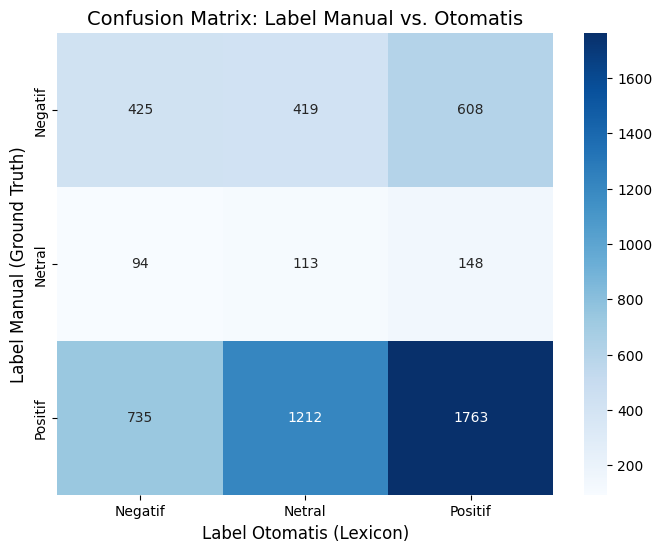


====== Metrik Evaluasi Kunci ======
Akurasi Keseluruhan: 41.71%
------------------------------
Laporan Klasifikasi Detail:
              precision    recall  f1-score   support

     Negatif       0.34      0.29      0.31      1452
      Netral       0.06      0.32      0.11       355
     Positif       0.70      0.48      0.57      3710

    accuracy                           0.42      5517
   macro avg       0.37      0.36      0.33      5517
weighted avg       0.56      0.42      0.47      5517

------------------------------
Cohen's Kappa Score: 0.049
Interpretasi: Kesepakatan BURUK.

🤔 [BAGIAN 4] Menganalisis data yang labelnya tidak cocok...
Ditemukan 3216 data dengan label yang tidak cocok.
Berikut adalah beberapa contohnya:
                            teks_bersih label_manual label_otomatis
1                bagus bukti stnk rumah      Positif         Netral
3                    bayar pajak signal       Netral        Negatif
5                        aplikasi bantu      Positif 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score

# ======================================================================
# BAGIAN 0: SETUP DAN FUNGSI
# ======================================================================
print("💡 [BAGIAN 0] Setup awal dan persiapan fungsi...")

# Unduh kamus leksikon positif dan negatif dari GitHub
try:
    positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
    negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"
    positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
    negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])
    print("Kamus leksikon positif dan negatif berhasil diunduh.")
except Exception as e:
    print(f"Error saat mengunduh kamus leksikon: {e}")
    exit()

# Fungsi untuk menentukan sentimen berdasarkan leksikon
def determine_sentiment_lexicon(text):
    if isinstance(text, str):
        # Mengubah teks menjadi huruf kecil agar sesuai dengan kamus
        text_lower = text.lower()
        positive_count = sum(1 for word in text_lower.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text_lower.split() if word in negative_lexicon)

        # Logika penentuan sentimen
        if positive_count > negative_count:
            return "Positif"
        elif negative_count > positive_count:
            return "Negatif"
        else:
            return "Netral"
    # Mengembalikan nilai default jika input bukan string
    return "Netral"

# ======================================================================
# BAGIAN 1: MEMUAT DATA SUMBER
# ======================================================================
print("\n[BAGIAN 1] Memuat data sumber...")

try:
    # 1A. Memuat file yang berisi teks bersih hasil stemming
    df_preprocessing = pd.read_csv("Hasil_Preprocessing_Data.csv")

    # 1B. Memuat file yang berisi label sentimen manual
    df_labelling = pd.read_csv("hasil label manual.csv")

    print("File 'Hasil_Preprocessing_Data.csv' dan 'hasil label manual.csv' berhasil dimuat.")
except FileNotFoundError as e:
    print(f"Error: Salah satu file tidak ditemukan. {e}")
    exit()

# ======================================================================
# BAGIAN 2: MENGGABUNGKAN DAN MEMBUAT LABEL OTOMATIS
# ======================================================================
print("\n[BAGIAN 2] Menggabungkan data dan membuat label otomatis...")

# Membuat DataFrame baru untuk perbandingan
df_compare = pd.DataFrame()
df_compare['teks_bersih'] = df_preprocessing['steming_data']
# Pastikan nama kolom di 'hasil label manual.csv' adalah 'Sentimen'
df_compare['label_manual'] = df_labelling['Sentimen']

# Hapus baris yang kosong untuk menjaga kualitas data
df_compare = df_compare.dropna().reset_index(drop=True)

# Terapkan fungsi leksikon untuk membuat label otomatis
print("Menerapkan metode lexicon-based untuk membuat label otomatis...")
df_compare['label_otomatis'] = df_compare['teks_bersih'].apply(determine_sentiment_lexicon)

print("\nDataFrame untuk perbandingan berhasil dibuat:")
print(df_compare.head())


# ======================================================================
# BAGIAN 3: MEMBANDINGKAN LABEL MANUAL VS OTOMATIS
# ======================================================================
print("\n📊 [BAGIAN 3] Memulai perbandingan antara label manual dan otomatis...")

# Definisikan label 'benar' (manual) dan label 'prediksi' (otomatis)
y_true = df_compare['label_manual']
y_pred = df_compare['label_otomatis']
# Dapatkan daftar label unik untuk urutan yang konsisten
labels = sorted(y_true.unique())

# 3A. Hitung dan tampilkan Confusion Matrix
print("\n====== Confusion Matrix ======")
cm = confusion_matrix(y_true, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix: Label Manual vs. Otomatis', fontsize=14)
plt.xlabel('Label Otomatis (Lexicon)', fontsize=12)
plt.ylabel('Label Manual (Ground Truth)', fontsize=12)
plt.show()

# 3B. Hitung dan tampilkan metrik utama
print("\n====== Metrik Evaluasi Kunci ======")

# Akurasi
accuracy = accuracy_score(y_true, y_pred)
print(f"Akurasi Keseluruhan: {accuracy:.2%}")
print("-" * 30)

# Laporan Klasifikasi (Precision, Recall, F1-Score)
print("Laporan Klasifikasi Detail:")
report = classification_report(y_true, y_pred, labels=labels, zero_division=0)
print(report)
print("-" * 30)

# Cohen's Kappa Score
kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.3f}")
if kappa > 0.8:
    print("Interpretasi: Kesepakatan SANGAT BAIK.")
elif kappa > 0.6:
    print("Interpretasi: Kesepakatan BAIK.")
elif kappa > 0.4:
    print("Interpretasi: Kesepakatan SEDANG.")
else:
    print("Interpretasi: Kesepakatan BURUK.")

# ======================================================================
# BAGIAN 4: ANALISIS KESALAHAN
# ======================================================================
print("\n🤔 [BAGIAN 4] Menganalisis data yang labelnya tidak cocok...")

mismatch_df = df_compare[df_compare['label_manual'] != df_compare['label_otomatis']]
if mismatch_df.empty:
    print("Luar biasa! Semua label cocok antara manual dan otomatis.")
else:
    print(f"Ditemukan {len(mismatch_df)} data dengan label yang tidak cocok.")
    print("Berikut adalah beberapa contohnya:")
    print(mismatch_df.head(10)) # Tampilkan 10 contoh pertama

# **PELABEALN LEXICON INSET**

In [ ]:
import pandas as pd
import requests

# Unduh kamus leksikon positif dan negatif dari GitHub
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count

        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"

        return sentiment_score, sentiment
    # Mengembalikan nilai default jika input bukan string
    return 0, "Netral"

# Tentukan sentimen dan skor untuk setiap ulasan
data[['Score', 'Sentiment']] = data['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))

# Tampilkan hasilnya
data.head(5)

,steming_data,Score,Sentiment
0,alhamdulillah mudah,1,Positif
1,bagus bukti stnk rumah,0,Netral
2,terima kasih signal,1,Positif
3,bayar pajak signal,-1,Negatif
4,terima kasih bapenda perintah prop lampung,1,Positif


/tmp/ipython-input-11-1973394491.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


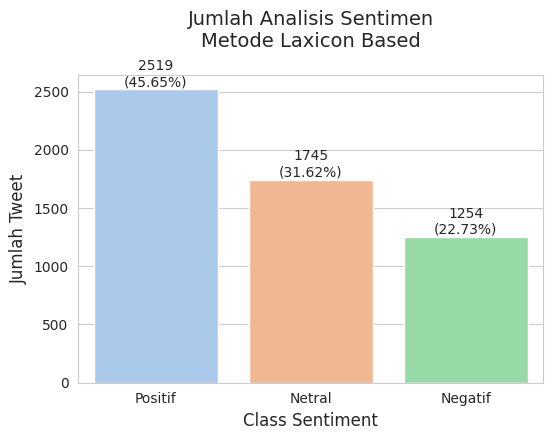

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen\nMetode Laxicon Based', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
data.to_csv('Hasil_Labelling_Data.csv', encoding='utf8', index=False)

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Hasil_Labelling_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,steming_data,Score,Sentiment
0,alhamdulillah mudah,1,Positif
1,bagus bukti stnk rumah,0,Netral
2,terima kasih signal,1,Positif
3,bayar pajak signal,-1,Negatif
4,terima kasih bapenda perintah prop lampung,1,Positif


# **SPLITTING DATA**

In [ ]:
!pip install numpy pandas scikit-learn tensorflow seaborn matplotlib

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting relevant columns
texts = data['steming_data'].astype(str).values
labels = data['Sentiment'].values

# Encoding labels into numeric values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")

Training data size: 4414
Testing data size: 1104


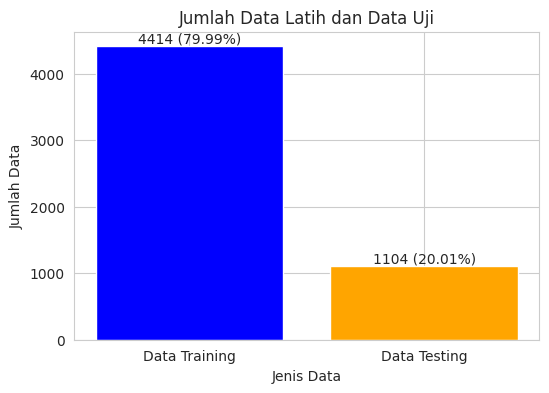

In [ ]:
# Encode labels
le = LabelEncoder()
Y = encoded_labels
Y = le.fit_transform(Y)
X = texts

train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height} ({(height / (train_size + test_size)) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

# **IMLEMENTASI LSTM**

In [ ]:
# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
max_len = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Model Building
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate the model
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

Epoch 1/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 45s 269ms/step - accuracy: 0.5093 - loss: 0.9787 - val_accuracy: 0.8668 - val_loss: 0.3835
Epoch 2/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 33s 214ms/step - accuracy: 0.8953 - loss: 0.3049 - val_accuracy: 0.9257 - val_loss: 0.2250
Epoch 3/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 30s 220ms/step - accuracy: 0.9667 - loss: 0.1209 - val_accuracy: 0.9040 - val_loss: 0.2919
Epoch 4/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.9802 - loss: 0.0721 - val_accuracy: 0.9321 - val_loss: 0.2299
Epoch 5/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 41s 213ms/step - accuracy: 0.9837 - loss: 0.0570 - val_accuracy: 0.9484 - val_loss: 0.2321
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step


In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print()

# Classification Report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(report)

Accuracy: 0.9483695652173914
Accuracy: 94.84%

              precision    recall  f1-score   support

     Negatif       0.98      0.92      0.95       252
      Netral       0.90      0.96      0.93       371
     Positif       0.97      0.95      0.96       481

    accuracy                           0.95      1104
   macro avg       0.95      0.94      0.95      1104
weighted avg       0.95      0.95      0.95      1104



In [ ]:
X = texts
y = encoded_labels

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, data.index, test_size=0.2, random_state=42)

# Gunakan indeks test untuk mengambil data asli
data_test = data.iloc[indices_test].reset_index(drop=True)

predictions = pd.DataFrame({
    'steming_data': data_test['steming_data'],
    'Actual': label_encoder.inverse_transform(y_test),
    'Predicted': label_encoder.inverse_transform(y_pred_classes)
})

# Simpan ke CSV
predictions.to_csv('Hasil_Predictions_lstm.csv', index=False)
predictions.head()

,steming_data,Actual,Predicted
0,bikin profil,Netral,Netral
1,bagus aplikasi cepat mantaapp mudah bayar paja...,Negatif,Negatif
2,ribet samsat ol bayar ya simpel,Positif,Positif
3,mantap aplikasi signal,Netral,Netral
4,bantu sibuk,Netral,Netral
